In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# check formula of insertion - origin distance
def d(theta):
    x1, y1 = -1, 0
    x2, y2 = 1, 0
    return np.sqrt(x1**2+y1**2+x2**2+y2**2 \
        - 2*np.cos(theta)*(x1*x2+y1*y2) \
        + 2*np.sin(theta)*(x1*y2-x2*y1))

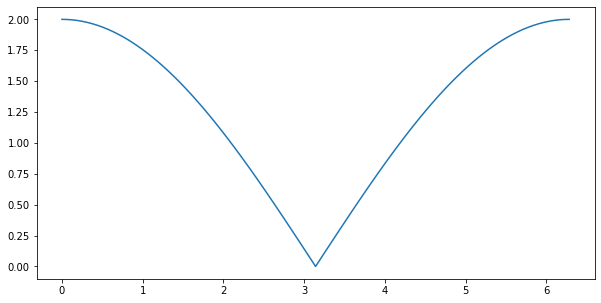

In [4]:
theta = np.linspace(0, 2*np.pi, 101)
eval_dist = d(theta)

plt.figure(figsize=(10,5))
plt.plot(theta, eval_dist)
plt.show()

### Formulas for MuJoCo's muscular model

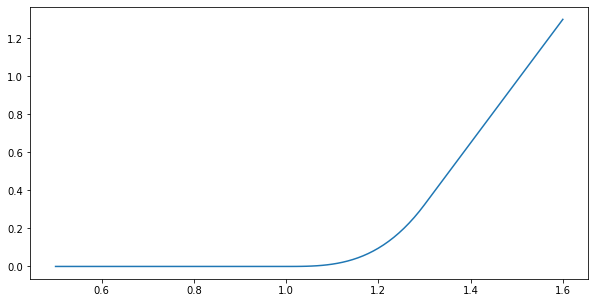

In [37]:
lmin, lmax = .5, 1.6
vmax = 1.5
fpmax, fvmax = 1.3, 1.2

a = 0.5*(lmin+1)
b = 0.5*(1+lmax)
c = fvmax-1

def F_P(l):
    if l<= 1:
        return 0.
    elif l <= b:
        x = (l-1)/(b-1)
        return .25*fpmax*x*x*x
    else:
        x = (l-b)/(b-1)
        return .25*fpmax*(1+3*x)


l = np.linspace(lmin, lmax, 100)
f_p = np.vectorize(F_P)(l)

plt.figure(figsize=(10,5))
plt.plot(l, f_p)
plt.show()

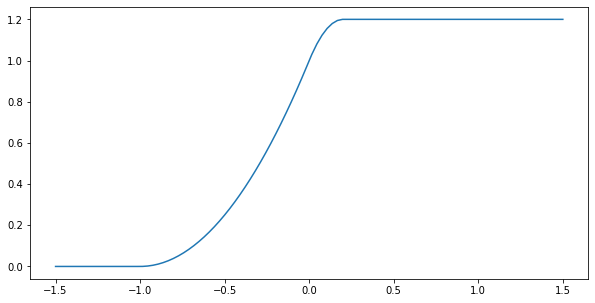

In [38]:
def F_V(v):
    if v<=-1:
        return 0.
    elif v <= 0:
        return (v+1)*(v+1)
    elif v <= c:
        return fvmax - (c-v)**2/c
    else:
        return fvmax

v = np.linspace(-vmax, vmax, 100)
f_v = np.vectorize(F_V)(v)

plt.figure(figsize=(10,5))
plt.plot(v, f_v)
plt.show()

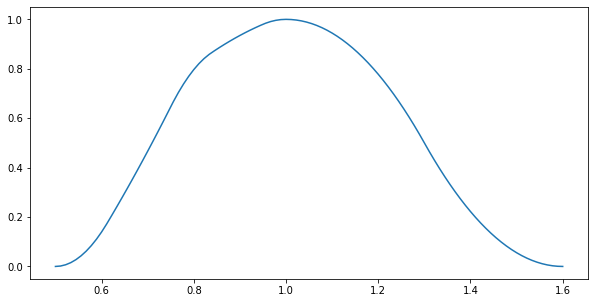

In [39]:
def bump(L, A, mid, B):
    left = 0.5*(A+mid)
    right = 0.5*(mid+B)

    if (L<=A) or (L>=B):
        return 0.
    elif L<left:
        x = (L-A)/(left-A)
        return 0.5*x*x
    elif L<mid:
        x = (mid-L)/(mid-left)
        return 1-0.5*x*x
    elif L<right:
        x = (L-mid)/(right-mid)
        return 1-0.5*x*x
    else:
        x = (B-L)/(B-right)
        return 0.5*x*x

def F_L(l):
    return bump(l, lmin, 1, lmax) + .15*bump(l, lmin, .5*(lmin+.95), .95)


l = np.linspace(lmin, lmax, 100)
f_l = np.vectorize(F_L)(l)

plt.figure(figsize=(10,5))
plt.plot(l, f_l)
plt.show()

In [25]:
def F_LV(l, v, u):
    return F_L(l)*F_V(v)*u+F_P(l)

F_0 = 50
def actuator_force(l, v, u):
    return -F_LV(l,v,u)*F_0

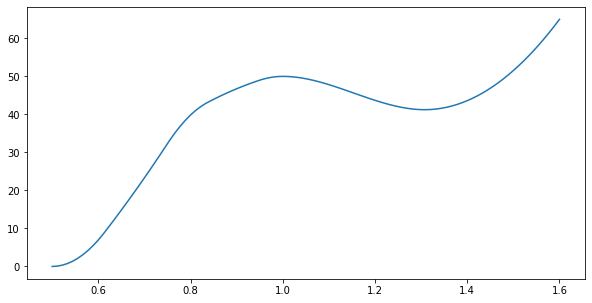

In [40]:
# isometric profile
l = np.linspace(lmin, lmax, 100)
u = 1.
v = 0.

def max_force_iso(l):
    return actuator_force(l,v=0, u=1)

force_iso = -np.vectorize(max_force_iso)(l)
plt.figure(figsize=(10,5))
plt.plot(l, force_iso)
plt.show()